In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df= pd.read_csv(r'C:\Users\Admin\Desktop\kathmandu_aqi.csv')

In [40]:
df.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,o3,0.057,ppm,27.738703,85.336205
1,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,pm25,50.000,µg/m³,27.738703,85.336205
2,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,pm25,46.000,µg/m³,27.738703,85.336205
3,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,o3,0.051,ppm,27.738703,85.336205
4,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T16:15:00+00:00,2021-03-12T22:00:00+05:45,pm25,45.000,µg/m³,27.738703,85.336205


In [60]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\kathmandu_aqi.csv', parse_dates=['utc'])

In [72]:
df_pm25 = df[df['parameter'] == 'pm25']  #only pm2.5 data

In [74]:
print(df_pm25.head())

   locationId                               location       city country  \
1        3459  US Diplomatic Post: Embassy Kathmandu  Kathmandu      NP   
2        3459  US Diplomatic Post: Embassy Kathmandu  Kathmandu      NP   
4        3459  US Diplomatic Post: Embassy Kathmandu  Kathmandu      NP   
7        3459  US Diplomatic Post: Embassy Kathmandu  Kathmandu      NP   
8        3459  US Diplomatic Post: Embassy Kathmandu  Kathmandu      NP   

                        utc                      local parameter  value  \
1 2021-03-12 18:15:00+00:00  2021-03-13T00:00:00+05:45      pm25   50.0   
2 2021-03-12 17:15:00+00:00  2021-03-12T23:00:00+05:45      pm25   46.0   
4 2021-03-12 16:15:00+00:00  2021-03-12T22:00:00+05:45      pm25   45.0   
7 2021-03-12 15:15:00+00:00  2021-03-12T21:00:00+05:45      pm25   50.0   
8 2021-03-12 14:15:00+00:00  2021-03-12T20:00:00+05:45      pm25   51.0   

    unit   latitude  longitude        date  
1  µg/m³  27.738703  85.336205  2021-03-12  
2  µg/m³

In [78]:
df_pm25 = df[df['parameter'] == 'pm25'].copy()

In [80]:
df_pm25['date'] = df_pm25['utc'].dt.date
df_pm25['hour'] = df_pm25['utc'].dt.hour

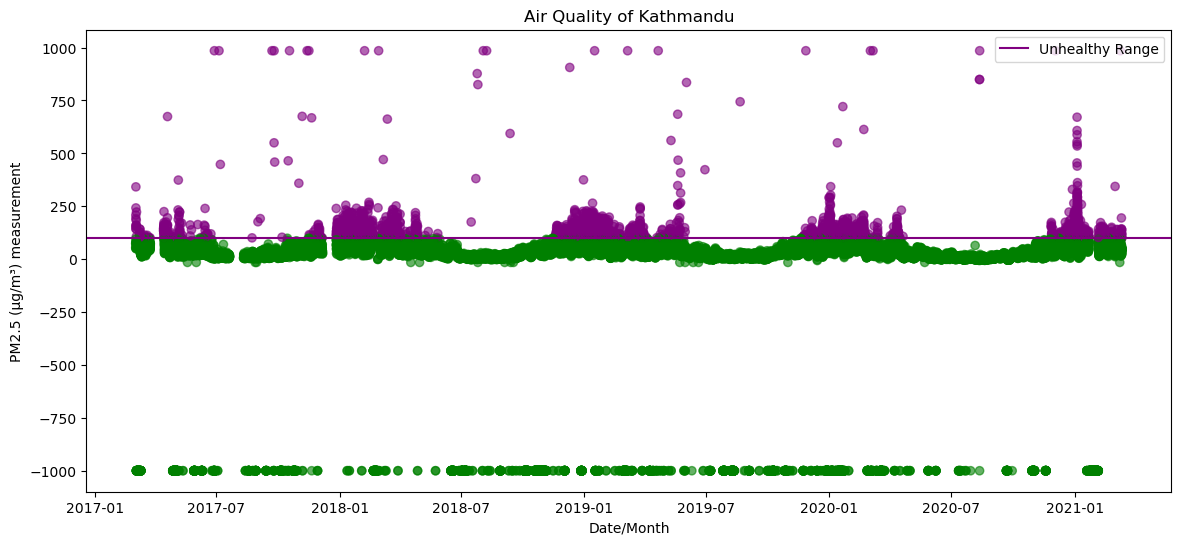

In [124]:
#Time Series Line Plot
plt.figure(figsize=(14,6))
plt.scatter(df_pm25['utc'], df_pm25['value'], 
            c=df_pm25['value'].apply(lambda x: 'purple' if x>100 else 'green'), 
            alpha=0.6)
plt.axhline(100, color='purple', linestyle='-', label='Unhealthy Range')
plt.title("Air Quality of Kathmandu")
plt.xlabel("Date/Month")
plt.ylabel("PM2.5 (µg/m³) measurement")
plt.legend()
plt.show()